In [1]:
import os
import sys
from gurobipy import *
import pandas as pd
import numpy as np
import itertools
import datetime
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

module_path = os.path.abspath("..")
sys.path.append(module_path)
from module.modele2 import init_model,Taches
from module.utils2 import (
    read_sillon,
    init_t_a,
    init_t_d,
    init_dict_correspondance,
    base_time,
    init_limites_voies,
    dernier_depart,
    ecriture_donnees_sortie,
    nombre_max_agents_sur_roulement,
    nombre_roulements,
    roulements_operants_sur_tache,
    heure_debut_roulement,
    comp,
)
from module.visualisation2 import (
    visualisation_gantt,
    visualisation_occupation
)

In [ ]:
# Charger le fichier Excel

id_file = 2

if id_file == 0:
    file = "mini_instance.xlsx"
elif id_file == 1:    
    file = "instance_WPY_realiste_jalon1.xlsx"
elif id_file == 2:
    file = "instance_WPY_realiste_jalon2.xlsx"
elif id_file == 3:
    file = "instance_WPY_simple.xlsx"
else:
    raise ValueError(f"Erreur : '{id_file}' n'est pas une valeur acceptable. Choisissez parmi 0, 1, 2 et 3.")

# Lire les feuilles "Sillons arrivée" et "Sillons départ"
df_sillons_arr, df_sillons_dep = read_sillon(file)

# Dictionnaires pour stocker les temps d'arrivée et de départ en minutes :
# Traitement des arrivées
t_a = init_t_a(df_sillons_arr, id_file)

t_d = init_t_d(df_sillons_dep, id_file)

time_base=base_time(id_file)

#Initialisation de l'intervalle de temps étudié
t_min=0
t_max=int(dernier_depart(df_sillons_dep,time_base)) #en quinzaine de minutes
#print(t_max//15+1)

# Vérification finale
#print("Vérification du contenu final de t_a :")
#for key, value in t_a.items():
#    print(f"Le train {key} arrive en gare de Woippy au bout de {value} minutes")

#print("Vérification du contenu final de t_d :")
#for key, value in t_d.items():
#    print(f"Le train {key} part de la gare de Woippy au bout de {value} minutes")

df_correspondance = pd.read_excel(file, sheet_name="Correspondances")

D = init_dict_correspondance(df_correspondance, id_file)
#print(D)

temps_min = 0
temps_max = int(t_max//15+1)

nb_roulements=nombre_roulements(file)

h_deb, nb_cycles_agents, nb_cycle_jour=heure_debut_roulement(file,temps_min,temps_max)
#print(nb_cycles_agents)
#print(h_deb)

#print(comp(file))
comp_arr, comp_dep = comp(file)

print(roulements_operants_sur_tache(file))
print(nombre_max_agents_sur_roulement(file))

Vérification du contenu final de t_a :
Le train 412202_08 arrive en gare de Woippy au bout de 1248 minutes
Le train 431018_08 arrive en gare de Woippy au bout de 801 minutes
Le train 431246_08 arrive en gare de Woippy au bout de 664 minutes
Le train 44951_08 arrive en gare de Woippy au bout de 1130 minutes
Le train 450237_08 arrive en gare de Woippy au bout de 707 minutes
Le train 489016_08 arrive en gare de Woippy au bout de 1415 minutes
Le train 54234_08 arrive en gare de Woippy au bout de 1321 minutes
Le train 55390_08 arrive en gare de Woippy au bout de 1429 minutes
Le train 56135_08 arrive en gare de Woippy au bout de 1288 minutes
Le train 412023_09 arrive en gare de Woippy au bout de 1567 minutes
Le train 41264_09 arrive en gare de Woippy au bout de 2793 minutes
Le train 431802_09 arrive en gare de Woippy au bout de 1620 minutes
Le train 44222_09 arrive en gare de Woippy au bout de 2533 minutes
Le train 44250_09 arrive en gare de Woippy au bout de 2058 minutes
Le train 44865_09 

In [3]:
model,t_arr,t_dep, is_present = init_model(
    liste_id_train_arrivee = t_a.keys(),
    t_a = t_a,
    liste_id_train_depart = t_d.keys(),
    t_d = t_d,
    dict_correspondances = D,
    file=file,
    id_file = id_file,
    limites_voies=init_limites_voies(file),
    temps_max=temps_max,
    temps_min=temps_min,
    nb_cycles_agents=nb_cycles_agents,
    heure_debut_roulement=h_deb,
    nombre_roulements=nb_roulements,
    equip=roulements_operants_sur_tache(file),
    max_agents_sur_roulement=nombre_max_agents_sur_roulement(file),
    #nombre_cycles=nombre_cycles_agents(file,temps_min,temps_max),
    h_deb=h_deb,
    comp_arr=comp_arr,
    comp_dep=comp_dep,
    nb_cycle_jour=nb_cycle_jour
)


Set parameter Username
Set parameter LicenseID to value 2618972
Academic license - for non-commercial use only - expires 2026-02-06


Contrainte assurant la succession des tâches sur les trains d'arrivée: 100%|██████████| 111/111 [00:00<?, ?it/s]
Contrainte assurant la succession des tâches sur les trains de départ: 100%|██████████| 106/106 [00:00<00:00, 35237.87it/s]
Contrainte assurant qu'il n'y a qu'un train niveau de la machine DEB: 100%|██████████| 111/111 [00:00<00:00, 152.33it/s]
Contrainte assurant qu'il n'y a qu'un train niveau des machines FOR et DEG: 100%|██████████| 2/2 [00:01<00:00,  1.91it/s]
Contrainte de fermeture du Chantier FOR: 100%|██████████| 106/106 [00:00<00:00, 1066.57it/s]
Contrainte assurant la succession des tâches entre les chantiers de REC et FOR: 100%|██████████| 106/106 [00:00<00:00, 6366.93it/s]
Contrainte relative au nombre de voies des chantiers: 100%|██████████| 910/910 [00:00<00:00, 2873.81it/s]
Contrainte définissant le temps de débranchement du premier wagon d'un train de départ: 100%|██████████| 106/106 [00:00<00:00, 106388.18it/s]


In [4]:
model.optimize()

if model.status == GRB.INFEASIBLE:
    print("Le modèle n'a pas de solution")
elif model.status == GRB.UNBOUNDED:
    print("Le modèle est non borné")
else:
    print("Ca marche !")
    for (m, n), var in t_arr.items():
        print(f"Tâche {m} - Train {n} : {15*var.x}")
    for (m, n), var in t_dep.items():
        print(f"Tâche {m} - Train {n} : {15*var.x}")
    print('La valeur objectif est :', model.objVal)

Le modèle n'a pas de solution


In [5]:
visualisation_gantt(t_arr,t_dep).show()

AttributeError: Unable to retrieve attribute 'X'

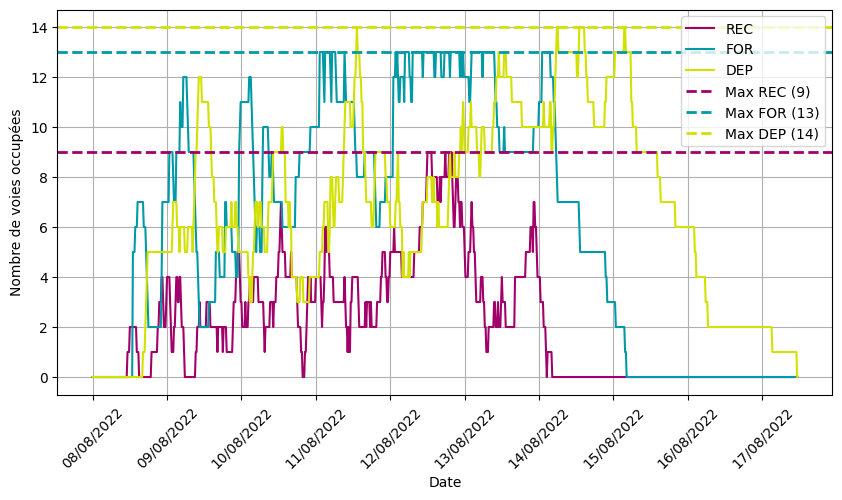

In [ ]:
# Correction du format de la date de référence
ref_date = datetime.datetime.strptime("08/08/2022", "%d/%m/%Y")

# Conversion des temps en dates au format "dd/mm/yyyy/HH/MM"
x_date = [ref_date + datetime.timedelta(minutes=15*t) for t in range((t_max-t_min)//15+2)]

# Calcul des voies occupées pour chaque chantier
occupation_REC = np.array([quicksum(is_present['REC'][(id_train, t)].X for id_train in t_a.keys()).getValue() for t in range((t_max-t_min)//15+2)])
occupation_FOR = np.array([quicksum(is_present['FOR'][(id_train, t)].X for id_train in t_d.keys()).getValue() for t in range((t_max-t_min)//15+2)])
occupation_DEP = np.array([quicksum(is_present['DEP'][(id_train, t)].X for id_train in t_d.keys()).getValue() for t in range((t_max-t_min)//15+2)])

if visualisation_occupation(occupation_REC, occupation_FOR, occupation_DEP, x_date):
    plt.show()


In [ ]:
ecriture_donnees_sortie(
    t_arr, 
    t_dep, 
    occupation_REC, 
    occupation_FOR, 
    occupation_REC, 
    x_date
)

NameError: name 't_arr' is not defined

In [ ]:
print(nombre_roulements(file))

NameError: name 'file' is not defined

In [ ]:
print(nombre_max_agents_sur_roulement(file))

{1: np.int64(6), 2: np.int64(8), 3: np.int64(2), 4: np.int64(1), 5: np.int64(7)}


In [ ]:
roulements_opérants_sur_tache(file)

{('arr', 1): [1, 4],
 ('dep', 1): [2, 5],
 ('arr', 2): [1, 4],
 ('dep', 2): [2, 5],
 ('arr', 3): [1, 4],
 ('dep', 3): [2, 5],
 ('dep', 4): [3, 4, 5]}

In [ ]:
nombre_cycles_agents(file,0,20000)

TypeError: 'dict' object is not callable

In [ ]:
print(heure_debut_roulement(file,{1: 42, 2: 42, 3: 42, 4: 28, 5: 42},5))

{(1, 1): 5, (1, 2): 13, (1, 3): 21, (1, 4): 29, (1, 5): 37, (1, 6): 45, (1, 7): 53, (1, 8): 61, (1, 9): 69, (1, 10): 77, (1, 11): 85, (1, 12): 93, (1, 13): 101, (1, 14): 109, (1, 15): 117, (1, 16): 125, (1, 17): 133, (1, 18): 141, (1, 19): 149, (1, 20): 157, (1, 21): 165, (1, 22): 173, (1, 23): 181, (1, 24): 189, (1, 25): 197, (1, 26): 205, (1, 27): 213, (1, 28): 221, (1, 29): 229, (1, 30): 237, (1, 31): 245, (1, 32): 253, (1, 33): 261, (1, 34): 269, (1, 35): 277, (1, 36): 285, (1, 37): 293, (1, 38): 301, (1, 39): 309, (1, 40): 317, (1, 41): 325, (1, 42): 333, (2, 1): 5, (2, 2): 13, (2, 3): 21, (2, 4): 29, (2, 5): 37, (2, 6): 45, (2, 7): 53, (2, 8): 61, (2, 9): 69, (2, 10): 77, (2, 11): 85, (2, 12): 93, (2, 13): 101, (2, 14): 109, (2, 15): 117, (2, 16): 125, (2, 17): 133, (2, 18): 141, (2, 19): 149, (2, 20): 157, (2, 21): 165, (2, 22): 173, (2, 23): 181, (2, 24): 189, (2, 25): 197, (2, 26): 205, (2, 27): 213, (2, 28): 221, (2, 29): 229, (2, 30): 237, (2, 31): 245, (2, 32): 253, (2, 33)

In [ ]:
print(comp(file))

{1: ['REC'], 2: ['FOR'], 3: ['DEP'], 4: ['REC', 'DEP'], 5: ['FOR', 'DEP']}
